# Разведочный анализ данных. Исследование и визуализация данных.
## Описание набора данных
В качестве набора данных мы будем использовать следующий - https://www.kaggle.com/gregorut/videogamesales
Этот набор данных содержит список видеоигр с продажами более 100 000 копий.

Датасет состоит из одного файла:
* vgsales.csv
    
Файл состоит из следующих колонок:
* Rank - Рейтинг общих продаж
* Имя - Название игры
* Platform - Платформа выпуска игр (например, PC,PS4 и т. д.)
* Year - Год выхода игры
* Genre - Жанр игры
* Publisher - Издатель игры
* NA_Sales - Продажи в Северной Америке (в миллионах)
* EU_Sales - Продажи в Европе (в миллионах)
* JP_Sales - Продажи в Японии (в миллионах)
* Other_Sales - Продажи в остальном мире (в миллионах)
* Global_Sales - Общий объем продаж по всему миру

## Импорт библиотек

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="whitegrid")

## Загрузка данных
Загрузим файлы датасета в помощью библиотеки Pandas.
Вызывая метод read_csv всегда стоит явно указывать разделитель данных с помощью параметра sep. В файлах с расширением .csv разделителем является запятая (',').

In [10]:
# Загружаем датасет
data = pd.read_csv('data/vgsales.csv', sep=",")

## Основные характеристики датасета

In [11]:
# Первые 5 строк датасета
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
# Размер датасета
data.shape

(16598, 11)

In [13]:
# количество строк в датасете
total_rows = data.shape[0]
print(f'Всего строк: {total_rows}')

Всего строк: 16598


In [14]:
# Список колонок
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [15]:
# Колонки с типами данных
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [16]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Rank - 0
Name - 0
Platform - 0
Year - 271
Genre - 0
Publisher - 58
NA_Sales - 0
EU_Sales - 0
JP_Sales - 0
Other_Sales - 0
Global_Sales - 0


In [19]:
# Основные статистические характеристки набора данных
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Визуальное исследование датасета

Построим самые часто-используемые диаграммы, используемые для визуальной оценки наборов данных.

### Диаграмма рассеяния

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

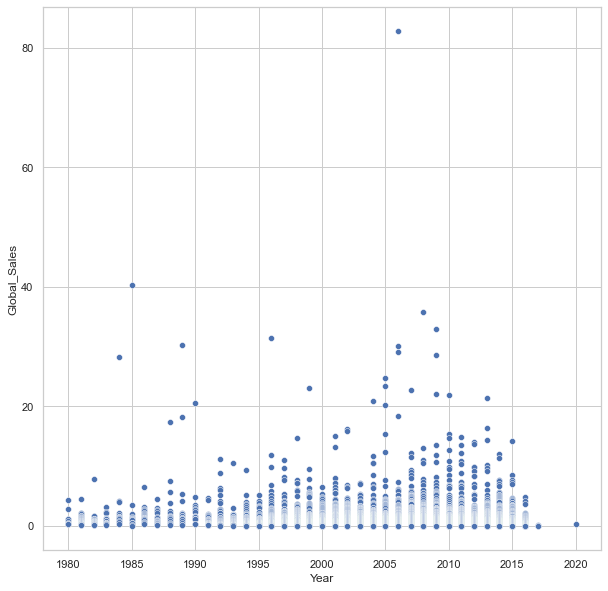

In [20]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Year', y='Global_Sales', data=data)

Посмотрим на жанры выведенных игр:

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

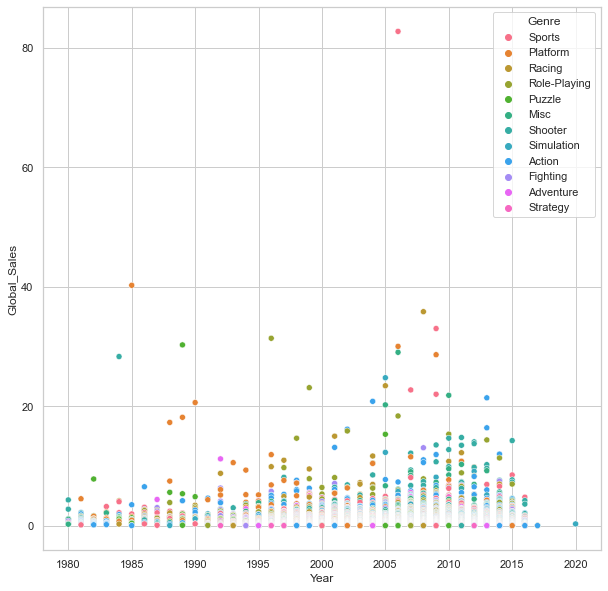

In [21]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Year', y='Global_Sales', data=data, hue="Genre")

### Гистограмма

/Users/savelevaa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

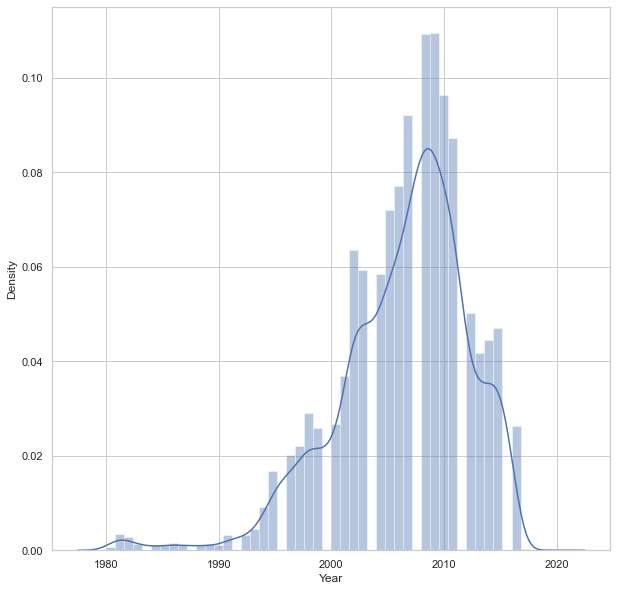

In [28]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['Year'])

### Комбинация гистограмм и диаграмм рассеивания

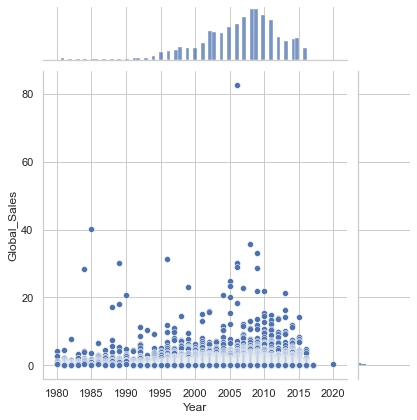

In [24]:
sns.jointplot(x='Year', y='Global_Sales', data=data)

### Парные диаграммы

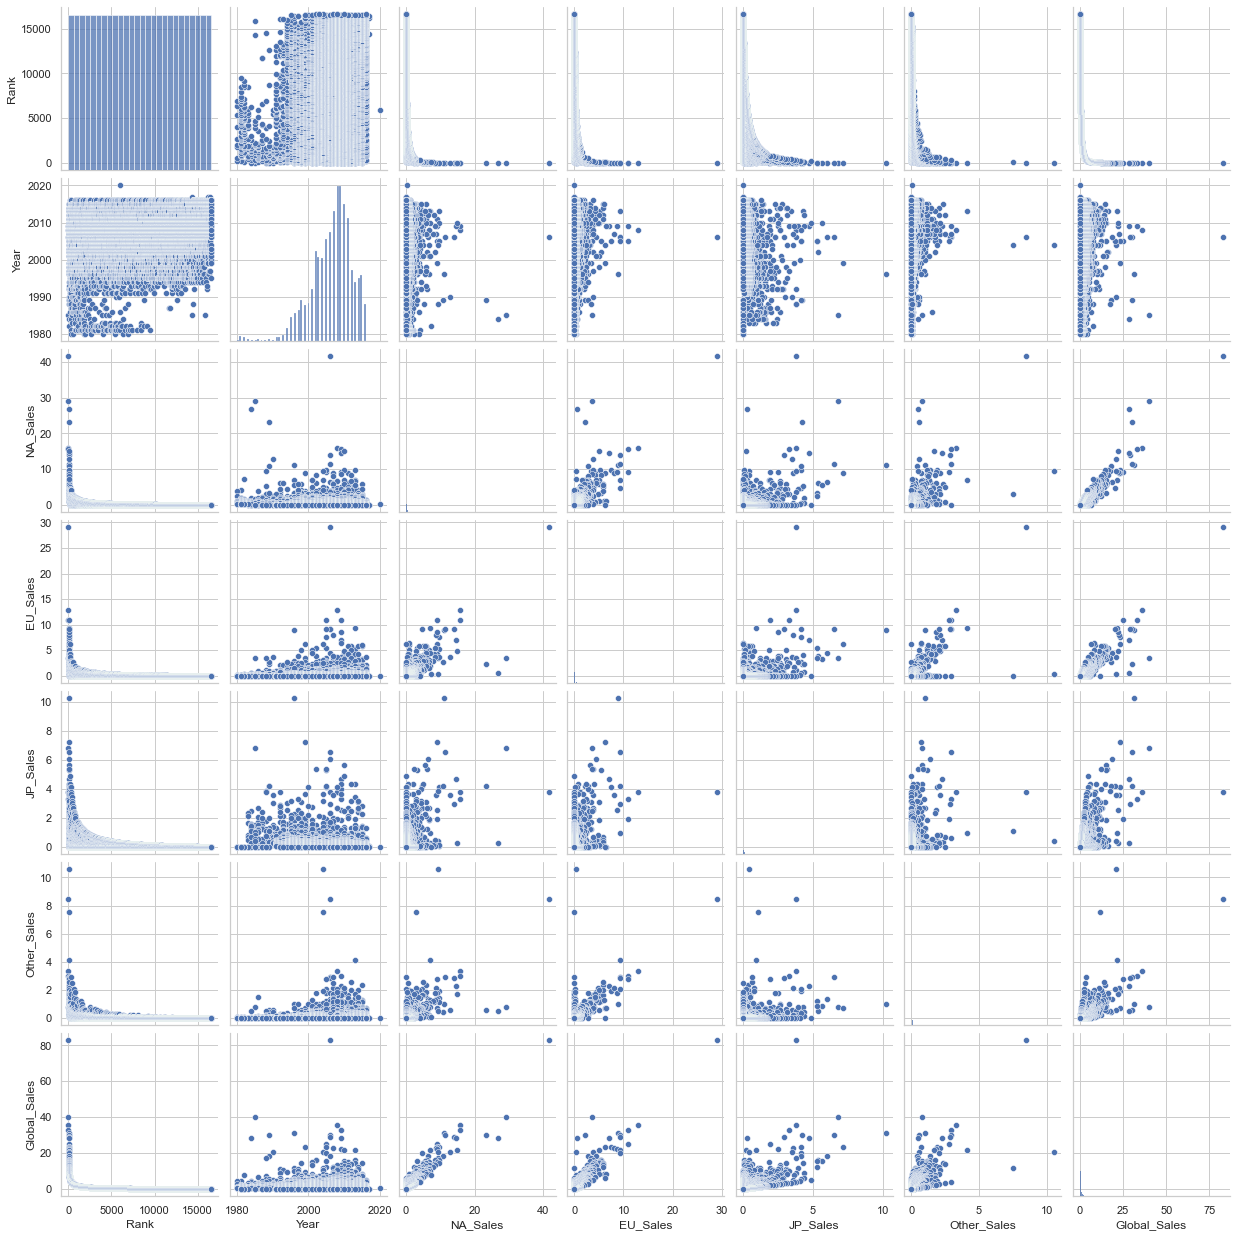

In [25]:
sns.pairplot(data)

### "Ящик с усами"

<AxesSubplot:xlabel='Year'>

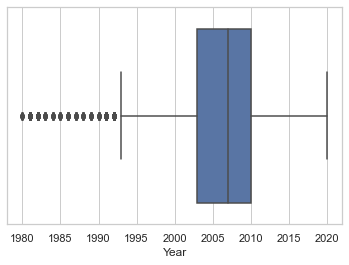

In [29]:
sns.boxplot(x=data['Year'])

### Скрипичный график

<AxesSubplot:xlabel='Year', ylabel='Count'>

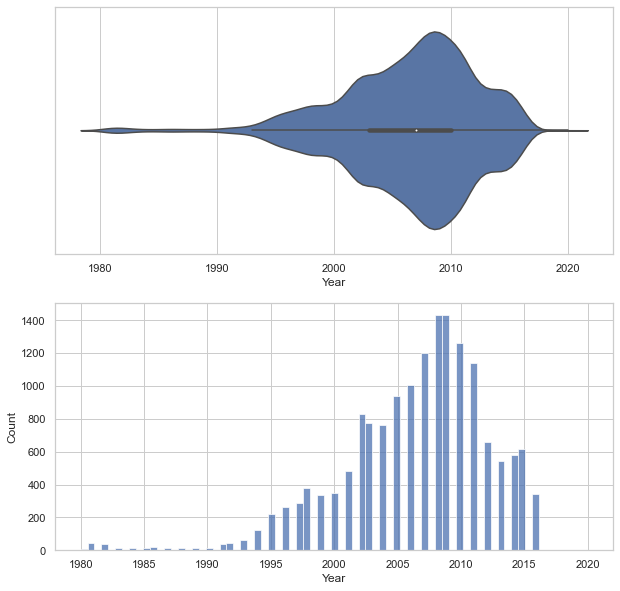

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Year'])
sns.histplot(data['Year'], ax=ax[1])

Видно что скрипичный график отображает распределение плотности

## Информация о корреляции признаков
Проверка корреляции признаков позволяет решить две задачи:

Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Occupancy"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.
### Корреляционная матрица

In [31]:
data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


### Heatmap

<AxesSubplot:>

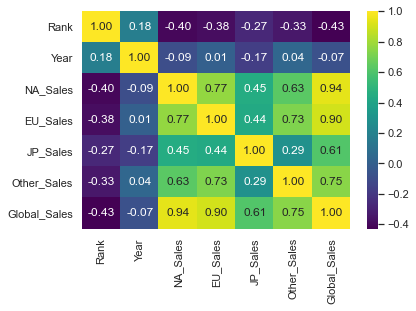

In [39]:
sns.heatmap(data.corr(), cmap='viridis', annot=True, fmt='.2f')

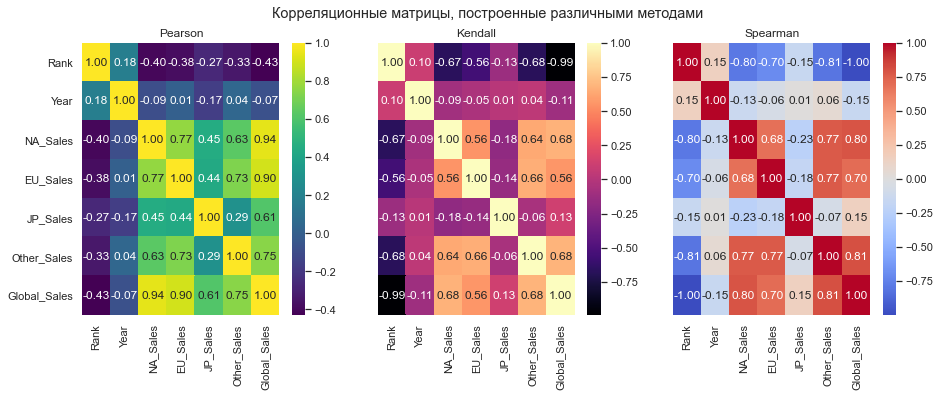

In [45]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), cmap='viridis', ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), cmap='magma', ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), cmap='coolwarm', ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')